# Author: Jaden Armstrong
# Date: 11/03/2023
# Name: Problem2_python.ipynp

First step is to import and read in the data via URL

In [12]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler


Nutrition_subset  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv");
Nutrition_subset

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


Describe Nutrition_subset to see what data we are working with in terms of distribution.

In [13]:
Nutrition_subset.describe()

,weight_in_grams,saturated_fat,cholesterol
count,961.000000,961.000000,961.00000
mean,149.409365,3.987617,32.55359
std,175.909357,10.744359,119.96059
min,0.400000,0.000000,0.00000
25%,32.000000,0.000000,0.00000
50%,113.000000,0.400000,0.00000
75%,218.000000,3.300000,20.00000
max,1542.000000,119.900000,2053.00000


Although this distribution seems odd, it may not have any 'incorrect' values since it is possible, for example, many items of food at small quanities have 0 cholesterol making the 50% percentile 0.

I will ignore removing 0's since it makes sense that some food items have 0 saturated_fat and/or cholesterol. I will focus on removing values below and above 3 std from the mean

In [14]:
# std and mean for weight_in_grams
std_wg = Nutrition_subset['saturated_fat'].std()
mean_wg = Nutrition_subset['saturated_fat'].mean()
Min_wg = mean_wg - (std_wg * 3)
Max_wg = mean_wg + (std_wg * 3)
# std and mean for saturated_fat
std_st = Nutrition_subset['saturated_fat'].std()
mean_st = Nutrition_subset['saturated_fat'].mean()
Min_st = mean_st - (std_st * 3)
Max_st = mean_st + (std_st * 3)
# std and mean for cholesterol
std_cl = Nutrition_subset['cholesterol'].std()
mean_cl = Nutrition_subset['cholesterol'].mean()
Min_cl = mean_st - (std_st * 3)
Max_cl = mean_st + (std_st * 3)

Nutrition_subset = Nutrition_subset[(Nutrition_subset['weight_in_grams'] >= Min_wg) & (Nutrition_subset['weight_in_grams'] <= Max_wg)]
Nutrition_subset = Nutrition_subset[(Nutrition_subset['saturated_fat'] >= Min_st) & (Nutrition_subset['saturated_fat'] <= Max_st)]
Nutrition_subset = Nutrition_subset[(Nutrition_subset['cholesterol'] >= Min_cl) & (Nutrition_subset['cholesterol'] <= Max_cl)]

Nutrition_subset.describe()

,weight_in_grams,saturated_fat,cholesterol
count,244.000000,244.000000,244.000000
mean,20.022131,1.251639,3.647541
std,9.291308,1.642278,7.726734
min,0.400000,0.000000,0.000000
25%,14.000000,0.100000,0.000000
50%,21.500000,0.500000,0.000000
75%,28.350000,1.800000,1.000000
max,35.000000,9.000000,32.000000


In [15]:
# Sort the DataFrame by 'saturated_fat' in descending order
sorted_subset = Nutrition_subset.sort_values(by='saturated_fat', ascending=False)

# Get the top 5 food items with the highest saturated fat
highest_saturated_fat = sorted_subset.head(5)

print(highest_saturated_fat)

                                  food item  weight_in_grams  saturated_fat  \
210  CHOCOLATE; BITTER OT BAKING   1 OZ                28.35            9.0   
909  BUTTER; UNSALTED              1 TBSP              14.00            7.1   
908  BUTTER; SALTED                1 TBSP              14.00            7.1   
329  CREAM CHEESE                  1 OZ                28.35            6.2   
72   CHEDDAR CHEESE                1 OZ                28.35            6.0   

     cholesterol  
210            0  
909           31  
908           31  
329           31  
72            30  


In [16]:
# Create saturated_fat_per_gram in Nutrition_subset
Nutrition_subset['saturated_fat_per_gram'] = Nutrition_subset['saturated_fat'] / Nutrition_subset['weight_in_grams']

# Sort the DataFrame by 'saturated_fat_per_gram' in descending order
sorted_subset = Nutrition_subset.sort_values(by='saturated_fat_per_gram', ascending=False)

# Get the top 5 food items with the highest saturated fat per gram
top_5_highest_saturated_fpg = sorted_subset.head(5)

# Find the food with the most saturated fat per gram
food_with_most_saturated_fpg = sorted_subset.iloc[0]

print(top_5_highest_saturated_fpg)
print("Food with the most saturated fat per gram:", food_with_most_saturated_fpg['food item'])

                                  food item  weight_in_grams  saturated_fat  \
908  BUTTER; SALTED                1 TBSP               14.0            7.1   
909  BUTTER; UNSALTED              1 TBSP               14.0            7.1   
913  BUTTER; UNSALTED              1 PAT                 5.0            2.5   
912  BUTTER; SALTED                1 PAT                 5.0            2.5   
899  LARD                          1 TBSP               13.0            5.1   

     cholesterol  saturated_fat_per_gram  
908           31                0.507143  
909           31                0.507143  
913           11                0.500000  
912           11                0.500000  
899           12                0.392308  
Food with the most saturated fat per gram: BUTTER; SALTED                1 TBSP  


Standardize (zero mean) the saturated_fat_per_gram

In [17]:
scaler = StandardScaler()
standardized_data = Nutrition_subset['saturated_fat_per_gram'].values.reshape(-1, 1)
standardized_data = scaler.fit_transform(standardized_data)

# 'standardized_data' now contains the standardized values

Identify outliers on both sides (upper and lower) of the scale.

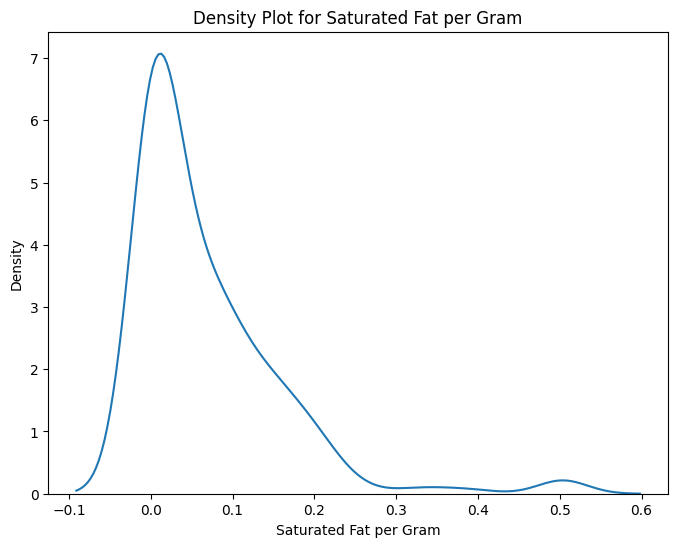

High-end outliers:
                                  food item  weight_in_grams  saturated_fat  \
899  LARD                          1 TBSP               13.0            5.1   
908  BUTTER; SALTED                1 TBSP               14.0            7.1   
909  BUTTER; UNSALTED              1 TBSP               14.0            7.1   
912  BUTTER; SALTED                1 PAT                 5.0            2.5   
913  BUTTER; UNSALTED              1 PAT                 5.0            2.5   
920  IMITATION CREAMERS; POWDERED  1 TSP                 2.0            0.7   

     cholesterol  saturated_fat_per_gram  
899           12                0.392308  
908           31                0.507143  
909           31                0.507143  
912           11                0.500000  
913           11                0.500000  
920            0                0.350000  
Low-end outliers:
There are no lower end outliers in this dataframe


In [18]:
z_scores = stats.zscore(Nutrition_subset['saturated_fat_per_gram'])

# Identify high-end outliers (values more than 3 standard deviations away from the mean)
upper_outliers = Nutrition_subset[z_scores > 3]

# Identify low-end outliers (values more than -3 standard deviations away from the mean)
lower_outliers = Nutrition_subset[z_scores < -3]

# Create a density plot for 'saturated_fat_per_gram'
plt.figure(figsize=(8, 6))
sns.kdeplot(Nutrition_subset['saturated_fat_per_gram'])
plt.title('Density Plot for Saturated Fat per Gram')
plt.xlabel('Saturated Fat per Gram')
plt.ylabel('Density')
plt.show()

print("High-end outliers:")
if upper_outliers.empty:
  print('There are no upper end outliers in this dataframe')
else:
  print(upper_outliers)

print("Low-end outliers:")
if lower_outliers.empty:
  print('There are no lower end outliers in this dataframe')
else:
  print(lower_outliers)

Describe Nutrition_subset to see if any more data cleansing needs to be done. I am not looking for outliers since any operation to take out the current outliers, there will still end up being outliers in the new distribution of data even though it is a correct entry that is in a larger quantity (grams) than others. Check for null values and impute if necessary.

In [19]:
Nutrition_subset.describe()

,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
count,244.000000,244.000000,244.000000,244.000000
mean,20.022131,1.251639,3.647541,0.067617
std,9.291308,1.642278,7.726734,0.090985
min,0.400000,0.000000,0.000000,0.000000
25%,14.000000,0.100000,0.000000,0.003214
50%,21.500000,0.500000,0.000000,0.033333
75%,28.350000,1.800000,1.000000,0.096429
max,35.000000,9.000000,32.000000,0.507143


In [20]:
# Check for null values by using info()
Nutrition_subset.info()
# 0 null values in the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 960
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   food item               244 non-null    object 
 1   weight_in_grams         244 non-null    float64
 2   saturated_fat           244 non-null    float64
 3   cholesterol             244 non-null    int64  
 4   saturated_fat_per_gram  244 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.4+ KB


No null values exist, so nothing needs to be done

Standardize (zero mean) the numeric variables, and determine if there are any outliers.

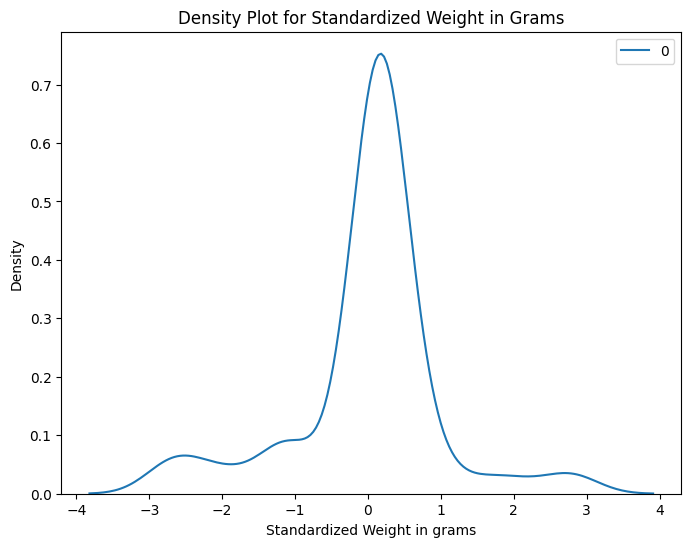

In [23]:
# Standardize 'weight_in_grams'
standardized_wig = scaler.fit_transform(Nutrition_subset['weight_in_grams'].values.reshape(-1, 1))

# Standardize 'cholesterol'
standardized_chl = scaler.fit_transform(Nutrition_subset['cholesterol'].values.reshape(-1, 1))

# Plot the density plot for standardized weight in grams
plt.figure(figsize=(8, 6))
sns.kdeplot(standardized_wig)
plt.title('Density Plot for Standardized Weight in Grams')
plt.xlabel('Standardized Weight in grams')
plt.ylabel('Density')
plt.show()


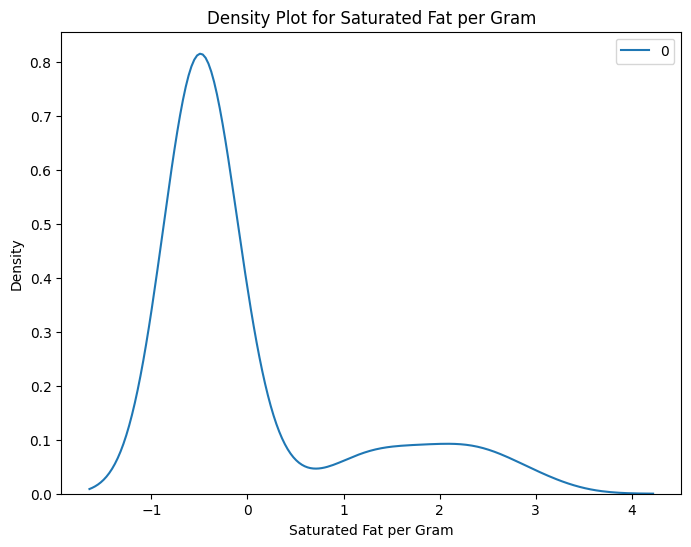

In [24]:
plt.figure(figsize=(8, 6))
sns.kdeplot(standardized_chl)
plt.title('Density Plot for Saturated Fat per Gram')
plt.xlabel('Saturated Fat per Gram')
plt.ylabel('Density')
plt.show()


In [21]:
mean = Nutrition_subset['weight_in_grams'].mean()
std = Nutrition_subset['weight_in_grams'].std()


Nutrition_subset = Nutrition_subset[((Nutrition_subset['weight_in_grams'] - mean)/std ) > 0]

# Create a DataFrame indicating whether each value is an outlier or not
outliers = (Nutrition_subset['weight_in_grams'].abs() > 3)

# Determine if there are any outliers
# Print the result
if outliers.any():
    print("There are outliers in the DataFrame:")
    print(Nutrition_subset[outliers])
else:
    print("There are no outliers in the DataFrame.")

There are outliers in the DataFrame:
                                  food item  weight_in_grams  saturated_fat  \
1    SEAWEED; SPIRULINA; DRIED     1 OZ                28.35            0.8   
3    PARMESAN CHEESE; GRATED       1 OZ                28.35            5.4   
33   PEANUTS; OIL ROASTED; SALTED  1 OZ                28.35            1.9   
34   PEANUTS; OIL ROASTED; UNSALTED1 OZ                28.35            1.9   
35   MOZZARELLA CHESE;SKIM; LOMOIST1 OZ                28.35            3.1   
..                                      ...              ...            ...   
850  CUCUMBER; W/ PEEL             6 SLICES            28.00            0.0   
853  HARD CANDY                    1 OZ                28.35            0.0   
854  FONDANT; UNCOATED             1 OZ                28.35            0.0   
855  GUM DROPS                     1 OZ                28.35            0.0   
950  PLUMS; RAW; 1-1/2-IN DIAM     1 PLUM              28.00            0.0   

     cholester

In conclusion, it is normal for there to be so many 0's in the data set for cholesterol and some for saturated_fat. Although this is because some items are much heavier in scale than the other majority of items so it is important to remove the large ones since it will skew our analysis. If you were to keep imputing the outliers with the mean of cholesterol, 0, then after a while the spread of data will go closer to 0 since the mean is still 0 which would effective remove outliers that are less than 3 standard deviations from the mean originally. Other than that, the analyses of standardized numeric values was helpful and the ploting of those values were successful.